# 训练模型
我将以一个简单的线性回归模型为例，讨论两种不同的训练方法来得到模型的最优解：

1. 直接使用封闭方程进行求根运算，得到模型在当前训练集上的最优参数（即在训练集上使损失函数达到最小值的模型参数）

2. 使用迭代优化方法：梯度下降（GD），在训练集上，它可以逐渐调整模型参数以获得最小的损失函数，最终，参数会收敛到和第一种方法相同的的值。

明确概念：啥叫训练模型？
> 训练模型就是通过设置模型的参数，直到模型最拟合训练集的过程。  
但首先要知道怎么测量模型对训练数据的拟合程度是好是坏。（定义cost-function）

## 标正规方程求解(the normal equation)
对于线性回归模型，解为
$$\hat{\theta} = ({\mathbf{X}}^T\cdot\mathbf{X})^{-1}\cdot{\mathbf{X}}^T\cdot\mathbf{y}$$

In [1]:
import numpy as np 
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X] # 添加 X0 = 1 给每个实例
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [2]:
theta_best

array([[3.80316572],
       [3.23203031]])

## 梯度下降
梯度下降是一种非常通用的优化算法，它能够很好地解决一系列问题。梯度下降的整体思路是通过的迭代来逐渐调整参数使得损失函数达到最小值。

假设浓雾下，你迷失在了大山中，你只能感受到自己脚下的坡度。为了最快到达山底，一个最好的方法就是沿着坡度最陡的地方下山。这其实就是梯度下降所做的：它计算误差函数关于参数向量$\theta$的局部梯度，同时它沿着梯度下降的方向进行下一次迭代。当梯度值为零的时候，就达到了误差函数最小值 。

具体来说，开始时需要选定一个随机的$\theta$（这个值称为随机初始值），然后逐渐去改进它，每一次变化一小步，每一步都试着降低损失函数（例如：均方差损失函数），直到损失函数收敛到一个最小值

$$
\frac{\partial}{\partial \theta_{j}} M S E(\theta)=\frac{2}{m} \sum_{i=1}^{m}\left(\theta^{T} \cdot \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}
$$

### 批量梯度下降

使用梯度下降的过程中，你需要计算每一个 $\theta_j$ 下损失函数的梯度。换句话说，你需要计算当$\theta_j$变化一点点时，损失函数改变了多少。这称为偏导数，它就像当你面对东方的时候问："我脚下的坡度是多少？"。然后面向北方的时候问同样的问题（如果你能想象一个超过三维的宇宙，可以对所有的方向都这样做）。公式 4-5 计算关于 $\theta_j$ 的损失函数的偏导数，记为 $\frac{\partial }{\partial \theta_j}MSE(\theta)$

In [3]:
import numpy as np

In [4]:
# 手推
eta = 0.05
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 初始化参数
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print('批量梯度下降最优参数为\n{}'.format(theta))

批量梯度下降最优参数为
[[3.80316348]
 [3.23203211]]


> 在这个方程中每一步计算时都包含了整个训练集 $\mathbf{X}$，这也是为什么这个算法称为批量梯度下降：每一次训练过程都使用所有的的训练数据。因此，在大数据集上，其会变得相当的慢（但是我们接下来将会介绍更快的梯度下降算法）。然而，梯度下降的运算规模和特征的数量成正比。训练一个数千数量特征的线性回归模型使用*梯度下降要比使用正规方程快的多。

***优点***：
+ 可以计算出最优解
+ 在小样本中，速度快

***缺点***：
+ 每一步梯度计算时需要使用整个训练集，导致在数据量大的情况下，计算会非常慢
+ 如果cost function 不是凸函数，得到的解可能不是最优解。

### 随机梯度下降
批量梯度下降的最要问题是计算每一步的梯度时都需要使用整个训练集，这导致在规模较大的数据集上，其会变得非常的慢。与其完全相反的随机梯度下降，在每一步的梯度计算上只随机选取训练集中的一个样本。很明显，由于每一次的操作都使用了非常少的数据，这样使得算法变得非常快。由于每一次迭代，只需要在内存中有一个实例，这使随机梯度算法可以在大规模训练集上使用。

另一方面，由于它的随机性，与批量梯度下降相比，其呈现出更多的不规律性：它到达最小值不是平缓的下降，损失函数会忽高忽低，只是在大体上呈下降趋势。随着时间的推移，它会非常的靠近最小值，但是它不会停止在一个值上，它会一直在这个值附近摆动。因此，当算法停止的时候，最后的参数还不错，但不是最优值

优点：
+ 可以在大样本中使用，收敛的速度快
+ 可以逃离局部最优
+ 每次迭代只需要在内存运行一个少量数据  

缺点：
+ 定位不出最优解

注意：
随机梯度下降时，训练实例必须独立且均匀分布，以确保平均来说将参数拉向全局最优。确保这一点的简单方法就是训练过程中对实例进行随机混洗。

In [5]:
n_epochs = 50
t0, t1 = 5, 50  #learning_schedule的超参数

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print('随机梯度下降最优参数为\n{}'.format(theta))

随机梯度下降最优参数为
[[3.81659798]
 [3.27096253]]


使用Scikit-Learn完成线性回归的随机梯度下降

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [7]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.80930073]), array([3.29105247]))

### 小批量梯度下降
优点：
+ 可以通过矩阵运算的硬件优化得到一个较好的训练表现
+ 小批量梯度下降会比随机梯度更靠近最小值

缺点：
+ 很难摆脱局部最优

## 多项式回归
如果你的数据实际上比简单的直线更复杂呢？ 令人惊讶的是，你依然可以使用线性模型来拟合非线性数据。 一个简单的方法是对每个特征进行加权后作为新的特征，然后训练一个线性模型在这个扩展的特征集。

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

## 学习曲线
如果你使用一个高阶的多项式回归，你可能发现它的拟合程度要比普通的线性回归要好的多。高阶的模型也意味着复杂，太复杂可能会对数据过拟合。

可以使用交叉验证来估计一个模型的泛化能力。如果一个模型在训练集上表现良好，通过交叉验证指标却得出其泛化能力很差，那么你的模型就是过拟合了。如果在这两方面都表现不好，那么它就是欠拟合了。这种方法可以告诉我们，你的模型是太复杂还是太简单了。

另一种方法是观察学习曲线：画出模型在训练集上的表现，同时画出以训练集规模为自变量的训练集函数。为了得到图像，需要在训练集的不同规模子集上进行多次训练。下面的代码定义了一个函数，用来画出给定训练集后的模型学习曲线：

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.figure(figsize=(20,10))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

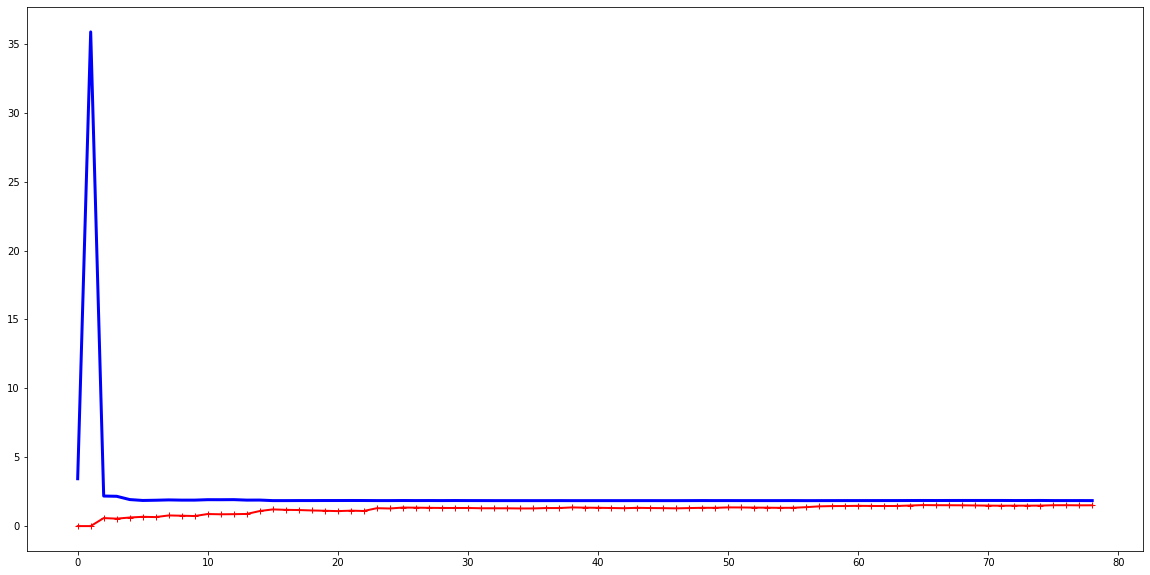

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

我们观察训练集的表现：当训练集只有一两个样本的时候，模型能够非常好的拟合它们，这也是为什么曲线是从零开始的原因。但是当加入了一些新的样本的时候，训练集上的拟合程度变得难以接受，出现这种情况有两个原因，一是因为数据中含有噪声，另一个是数据根本不是线性的。因此随着数据规模的增大，误差也会一直增大，直到达到高原地带并趋于稳定，在之后，继续加入新的样本，模型的平均误差不会变得更好或者更差。我们继续来看模型在验证集上的表现，当以非常少的样本去训练时，模型不能恰当的泛化，也就是为什么验证误差一开始是非常大的。当训练样本变多的到时候，模型学习的东西变多，验证误差开始缓慢的下降。但是一条直线不可能很好的拟合这些数据，因此最后误差会到达在一个高原地带并趋于稳定，最后和训练集的曲线非常接近。

上面的曲线表现了一个典型的欠拟合模型，两条曲线都到达高原地带并趋于稳定，并且最后两条曲线非常接近，同时误差值非常大。

> 提示  
如果你的模型在训练集上是欠拟合的，添加更多的样本是没用的。你需要使用一个更复杂的模型或者找到更好的特征

***相同数据上3阶多项式模型拟合的学习曲线***

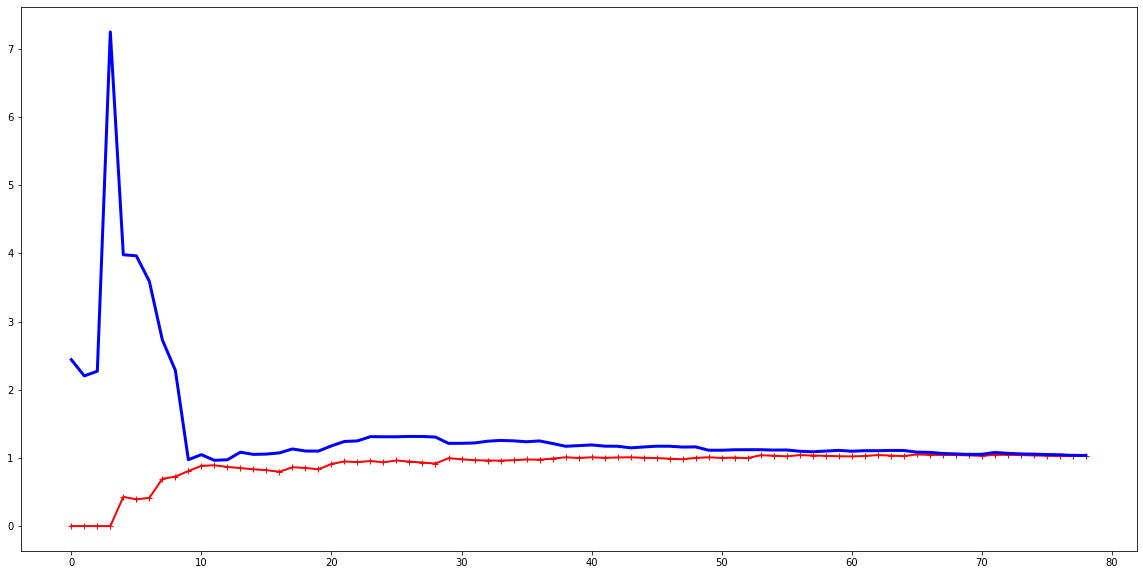

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

这幅图像和之前的有一点点像，但是其有两个非常重要的不同点：

在训练集上，误差要比线性回归模型低的多。
图中的两条曲线之间有间隔，这意味模型在训练集上的表现要比验证集上好的多，这也是模型过拟合的显著特点。当然，如果你使用了更大的训练数据，这两条曲线最后会非常的接近

**改善过拟合的一种很好的方法是加入更多的数据**

## 正则化线性模型
降低模型的过拟合的好方法是正则化这个模型（即限制它）：模型有越少的自由度，就越难以拟合数据。正则化多项式模型的一种简单方法就是减少多项式的次数。

对于线性模型，正则化通常是通过约束模型的权重来实现的。一般有三种正则化***岭回归， Lasso回归， 弹性网络***

### 岭回归
岭回归（也称为 Tikhonov 正则化）是线性回归的正则化版：在损失函数上直接加上一个正则项$$\alpha\sum_{i=1}^n\theta_i^2$$  这使得学习算法不仅能够拟合数据，而且能够使模型的参数权重尽量的小。注意到这个正则项只有在训练过程中才会被加到损失函数。当得到完成训练的模型后，我们应该使用没有正则化的测量方法去评价模型的表现。

> 提示
>
> 一般情况下，训练过程使用的损失函数和测试过程使用的评价函数是不一样的。除了正则化，还有一个不同：训练时的损失函数应该在优化过程中易于求导，而在测试过程中，评价函数更应该接近最后的客观表现。一个好的例子：在分类训练中我们使用对数损失（马上我们会讨论它）作为损失函数，但是我们却使用精确率/召回率来作为它的评价函数。

超参数 $\alpha $决定了你想正则化这个模型的强度。如果 $\alpha=0$ 那此时的岭回归便变为了线性回归。如果 $\alpha$非常的大，所有的权重最后都接近于零，最后结果将是一条穿过数据平均值的水平直线。 以下是岭回归的损失函数：
$$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum\limits_{i=1}^n\theta_i^2$$

值得注意的是偏差 $\theta_0$ 是没有被正则化的（累加运算的开始是 $i=1$ 而不是 $i=0$）

***在执行岭回归前缩放数据是很重要的，因为岭回归对输入特征非常敏感***

#### 岭回归闭合解
$$\hat{\theta} =({\mathbf{X}}^T\cdot\mathbf{X}+\alpha\mathbf{A})^{-1}\cdot{\mathbf{X}}^T\cdot\mathbf{y}$$


In [12]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.1508953]])



#### 岭回归梯度随机下降法

`penalty`参数指的是正则项的惩罚类型。指定“l2”表明你要在损失函数上添加一项：权重向量 $\ell_2$ 范数平方的一半，这就是简单的岭回归。

In [29]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.81962005])

### Lasso 回归
Lasso回归是另一种正则化的线性回归，就像岭回归，它在损失函数上添加了一个正则项，它增加的是 $\ell_1$范数,损失函数如下
$$J(\theta)=MSE(\theta)+\alpha\sum\limits_{i=1}^n\left|\theta_i \right|$$

Lasso回归很重要的特点是它倾向于完全消除最不重要特征的权重（也就是将他们设置为0）。也就是说Lasso回归自动的进行特征选择同时输出一个稀疏模型（即，具有很少的非零权重）

In [14]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # 或者 lasso_reg = SGDRegressor(penlty="l1")
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.10182137])

### 弹性网络
弹性网络介于 Ridge 回归和 Lasso 回归之间。它的正则项是 Ridge 回归和 Lasso 回归正则项的简单混合，同时你可以控制它们的混合率。损失函数如下：
$$J(\theta)=MSE(\theta)+r\alpha\sum\limits_{i=1}^n\left|\theta_i \right|+\frac{1-r}{2}\alpha\sum\limits_{i=1}^n\theta_i^2$$

你可以控制混合比例r，当r=0时，弹性网络等效于岭回归，当r=1时，弹性网络等效于Lasso回归。


### 早期停止法（Early Stopping）

对于梯度下降这一类算法，有一种非常特殊的正则化方法，就像***梯度下降在验证错误达到最小值时立即停止训练***那样。我们称为早期停止法。随着训练的进行，算法一直学习，它在训练集上的预测误差（RMSE）自然而然的下降。然而一段时间后，验证误差停止下降，并开始上升。这意味着模型在训练集上开始出现过拟合。一旦模型在验证集上错误达到最小值，便提早停止训练。这种简单有效的正则化方法被称为“完美的免费午餐”

In [57]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

train_errors, val_errors = [], []
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    
    val_error = mean_squared_error(y_val, y_val_predict)
    train_error = mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [65]:
best_model.fit(X_train_poly_scaled, y_train)
mean_squared_error(best_model.predict(X_val_poly_scaled), y_val)

13.134210529330037

In [67]:
for epoch in range(best_epoch):
    best_model.fit(X_train_poly_scaled, y_train)
mean_squared_error(best_model.predict(X_val_poly_scaled), y_val)

1.3514536885949358

In [66]:
val_errors

[14.57517256385085,
 14.098243099724682,
 13.600937248825128,
 13.134210529330037,
 12.699950202097543,
 12.295115752237274,
 11.916629984938302,
 11.561778670127847,
 11.228193817646725,
 10.913806728046364,
 10.61680536602888,
 10.335598079061795,
 10.068782874511232,
 9.815121374510463,
 9.573516695172898,
 9.34299462108669,
 9.122687550778448,
 8.911820775847671,
 8.709700728682073,
 8.515704893614462,
 8.329273126188777,
 8.149900166613213,
 7.977129167935422,
 7.810546088170643,
 7.649774819533558,
 7.4944729478833025,
 7.344328052161997,
 7.199054467547294,
 7.058390447710459,
 6.922095671354856,
 6.789949046421635,
 6.661746772252558,
 6.537300625811029,
 6.41643644296214,
 6.298992769950962,
 6.184819663718982,
 6.073777622666121,
 5.9657366319849965,
 5.8605753098377305,
 5.758180142472814,
 5.6584447979402706,
 5.561269509399489,
 5.466560520160146,
 5.37422958358184,
 5.28419351180705,
 5.196373768034932,
 5.110696097677848,
 5.027090194292709,
 4.945489396657403,
 4.865830

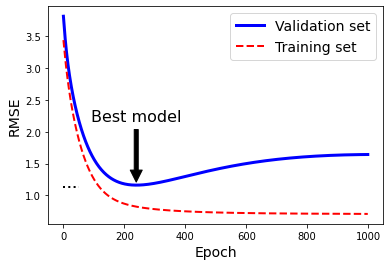

In [70]:

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## 逻辑回归
Logistic Regression 逻辑回归被广泛用于估算一个实例属于某个特定类别的概率。它是一个二元分类器。（如果预测大于0。5，则标记为，反之被标记为0）

### 估计概率
工作原理： LR 就像线性回归模型一样，LR计算输入特征的加权和（加上偏置项）。

LR输出是一个0-1的概率（数理逻辑值），$\hat{p}=h_\theta(\mathbf{x})=\sigma(\theta^T  \cdot \mathbf{x})$

Sigmoid函数如下：
$$\sigma(t)=\frac{1}{1+exp(-t)}$$

### 训练和成本函数
训练的目的是设置参数向量 $\theta$，使得正例$y=1$概率增大，负例$y=0$的概率减小，其通过在单个训练实例 $\mathbf{x}$的损失函数来实现

***单个例子的成本函数***

$$c(\theta)= \begin{cases} -log(\hat{p}), &y=1 \\ -log(1-\hat{p}),&y=0 \\ \end{cases}$$

***LR成本函数***

$$J(\theta)=-\frac{1}{m}\sum\limits_{i=1}^m\left[y^{(i)}log\left(\hat{p}^{(i)}\right)+\left(1-y^{(i)}\right)log\left(1-\hat{p}^{(i)}\right)\right]$$

### 决策边界

In [72]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [77]:
X = iris['data'][:, 3:]
y = (iris['target'] ==2).astype(np.int)

In [80]:
# 训练一个logistic regression模型
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

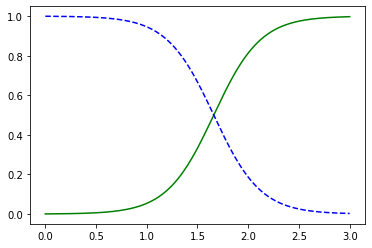

In [91]:
import numpy as np
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # -1 意味着这个维度没有指定 [-1, 1]
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginica")

In [106]:
log_reg.predict([[1.8],[1.5]])

array([1, 0])

在 Scikit-Learn 的`LogisticRegression`模型中控制正则化强度的超参数不是 $\alpha$（与其他线性模型一样），而是它的逆：$C$, C的值越大，模型正则化强度越低。

### Softmax 回归
LR模型经过推广，可以扩展到支持多个分类，而不需要训练多个二元分类器。可以叫做***多元逻辑回归***

#### 模型
*类k*的softmax分数： $s_k(\mathbf{x})= \theta^T  \cdot \mathbf{x}$。每个类都有自己特定参数向量$\theta_k$。一旦为实例x计算了每个类的softmax分数，就可以通过softmax 函数来估计例子属于某类k的概率。

Softmax函数是计算每个softmax分数的指数，然后对其进行归一化（除以所有分数的总和）。
$$\hat{p_k}=\sigma{(\mathbf{s}(\mathbf{x}))}k= \frac{exp\left(s_k(\mathbf{x})\right)} {\sum_{j=1}^{K}exp\left(s_j(\mathbf{x})\right)}$$

***SoftMax 回归模型分类器预测结果***:
$$\hat{y}=argmax\ \sigma{(\mathbf{s}(\mathbf{x}))_k}=argmax \ s_k(\mathbf{x})=argmax \ \left( \theta_k^T  \cdot \mathbf{x}\right)$$
`argmax`运算返回一个函数取到最大值的变量值。 在这个等式，它返回使 $\sigma{(\mathbf{s}(\mathbf{x}))_k}$ 最大值

#### 损失函数
$$J(\Theta)=-\frac{1}{m}\sum\limits_{i=1}^m\sum\limits_{k=1}^Ky_k^{(i)}log\left(\hat{p}_k^{(i)}\right)$$

In [111]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5,2]])

array([2])

In [113]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])